In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import cv2

In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip3 install opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip show opencv-python

Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages
Requires: numpy
Required-by: 


In [4]:
import sys
print(sys.executable)


/opt/anaconda3/bin/python


In [5]:
!which pip


/Library/Frameworks/Python.framework/Versions/3.13/bin/pip


In [6]:
!{sys.executable} -m pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)


# Part 1. PCA and MNIST handwritten digit classification

1. Load the MNIST handwritten digit dataset.
2. Make a train-test split of the data.
3. Use the training set to make scree plot.
4. Choose a number of principal components, $n$, to use for training based on your scree plot.
5. Train some classification models:
    1. Model 1: Use all of the data. 
    2. Model 2: Use $n$ principal components.
    3. Model 3: Use $n/2$ (round if necessary) principal components.
6. Discuss the results. 

In [25]:
#1
mnist = fetch_openml('mnist_784', return_X_y=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)

In [26]:
#2
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y, random_state=42)


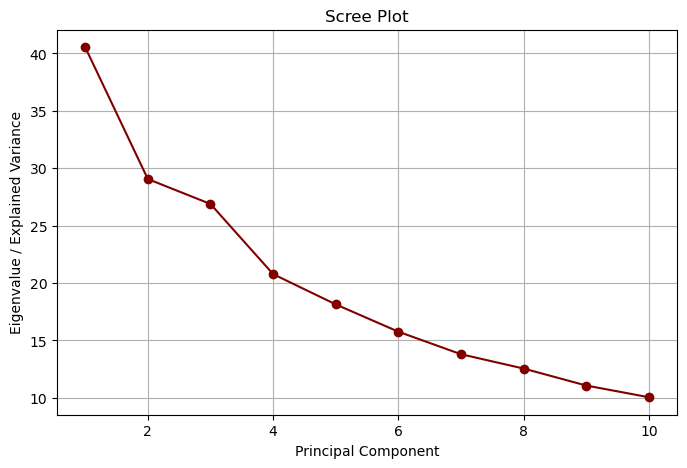

In [31]:
#3
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

pca = PCA(n_components=10)
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', color='maroon')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue / Explained Variance')
plt.grid(True)
plt.show()

In [32]:
#4
n = 4
print('Chose n=4, so n/2=2')


Chose n=4, so n/2=2


In [20]:
# 5.1
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled, y_train)
acc1 = model1.score(X_test_scaled, y_test)

# 5.2 
pca_n = PCA(n_components=n)
X_train_pca4 = pca_n.fit_transform(X_train_scaled)
X_test_pca4  = pca_n.transform(X_test_scaled)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_pca4, y_train)
acc2 = model2.score(X_test_pca4, y_test)

# 5.3 
pca_n2 = PCA(n_components=(n//2))
X_train_pca2 = pca_n2.fit_transform(X_train_scaled)
X_test_pca2  = pca_n2.transform(X_test_scaled)

model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_pca2, y_train)
acc3 = model3.score(X_test_pca2, y_test)


print('Model 1 accuracy(all data)', acc1)
print('Model 2 accuracy(n=4)', acc2)
print('Model 3 accuracy(n=2)', acc3)

Model 1 accuracy(all data) 0.9113333333333333
Model 2 accuracy(n=4) 0.6140952380952381
Model 3 accuracy(n=2) 0.3360952380952381


## 6

Using all of the pixels, the model correctly identified digits about 91% of the time. When using only 4 principal components, accuracy dropped to about 61%. Going down to 2 components made accuracy fall to around 34%. This shows that although PCA can use less data and speed up training, in this specific situation using too few components removes too important of information and significantly decreases accuracy.

# Part 2. Image compression

1. Use OpenCV to import a jpg image and covert it to grayscale.
2. Use np.linalg.matrix_rank( ) to compute the rank of your data matrix.
3. Compress your image by keeping 100, 50, and 25 principal components and show each of  the reconstructed images.

In [39]:
#showing image in color, tried using imshow to show the image in color and it was not right
from PIL import Image

try:
    image = Image.open("Gideon.jpg")
    image.show()
except FileNotFoundError:
    print("Error: Image file not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# 2.1

In [40]:
array = cv2.imread('Gideon.jpg')

In [41]:
array = cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)

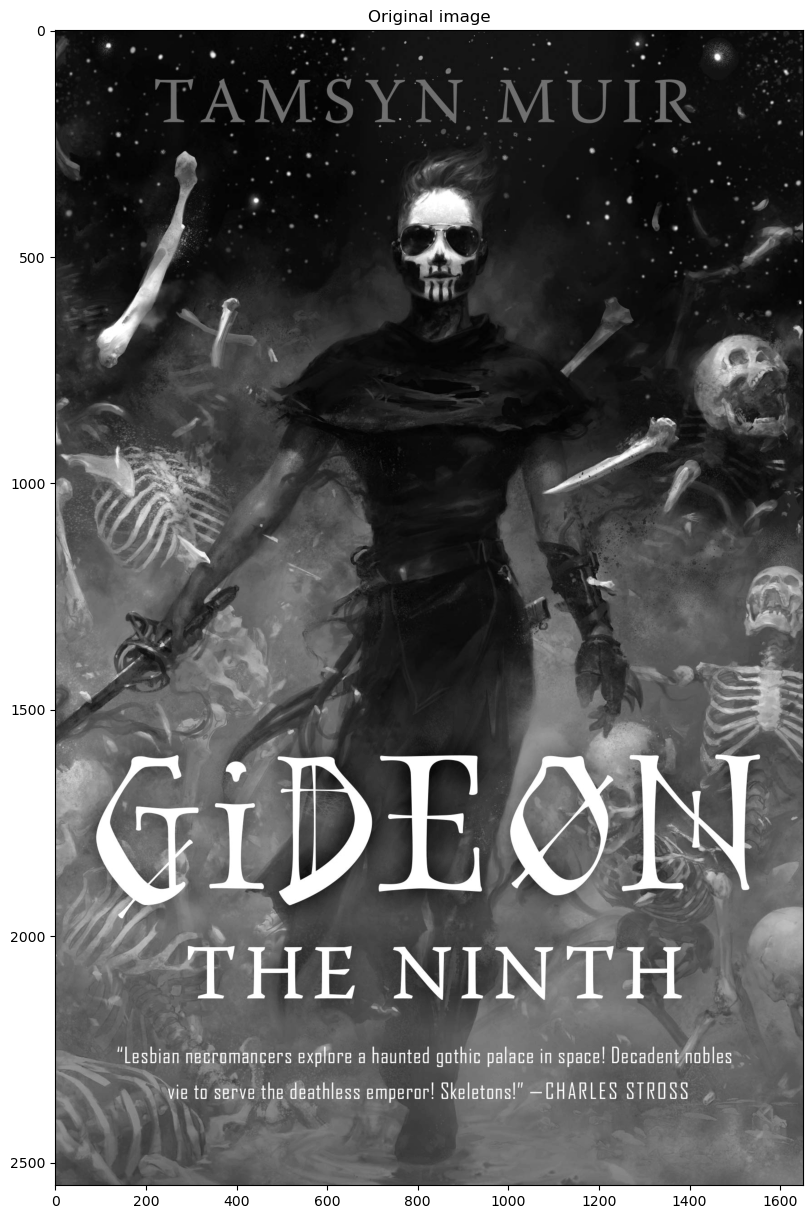

In [42]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,15))
ax1.imshow(array, cmap='gray')
ax1.set_title("Original image")

plt.show()

In [34]:
array.shape

(2550, 1650)

# 2.2

In [35]:
np.linalg.matrix_rank(array)

1650

# 2.3 
Compress your image by keeping 100, 50, and 25 principal components and show each of the reconstructed images.

rank(mat) =  1650
rank(mat_approx) =  100


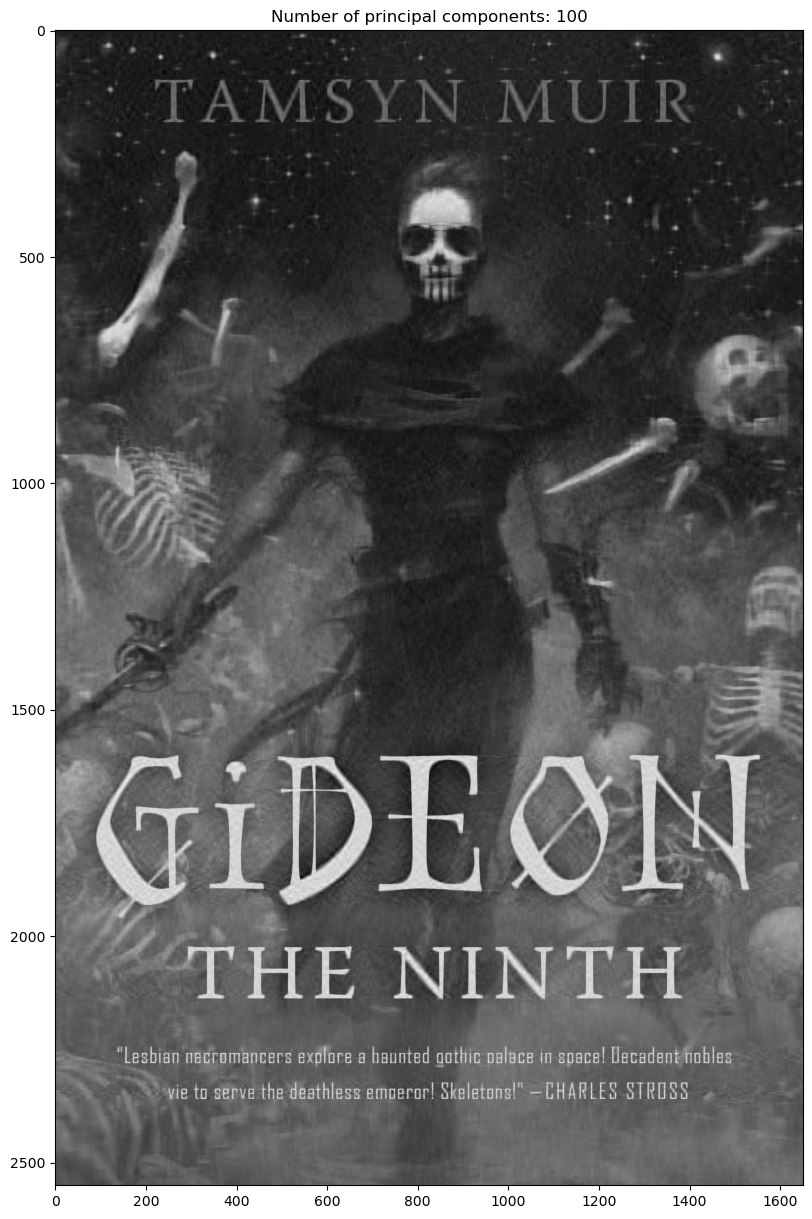

In [37]:
k = 100

array = cv2.imread('Gideon.jpg')
array = cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)


X = array.copy()


pca = PCA(n_components=k)  
X_pca = pca.fit_transform(X)          
X_reconstructed = pca.inverse_transform(X_pca)  

fig, (ax1) = plt.subplots(1, 1, figsize=(20,15))

ax1.imshow(X_reconstructed, cmap='gray')
ax1.set_title(f"Number of principal components: {k}")
print('rank(mat) = ', np.linalg.matrix_rank(X))
print('rank(mat_approx) = ', np.linalg.matrix_rank(X_pca))

plt.show()

rank(mat) =  1650
rank(mat_approx) =  50


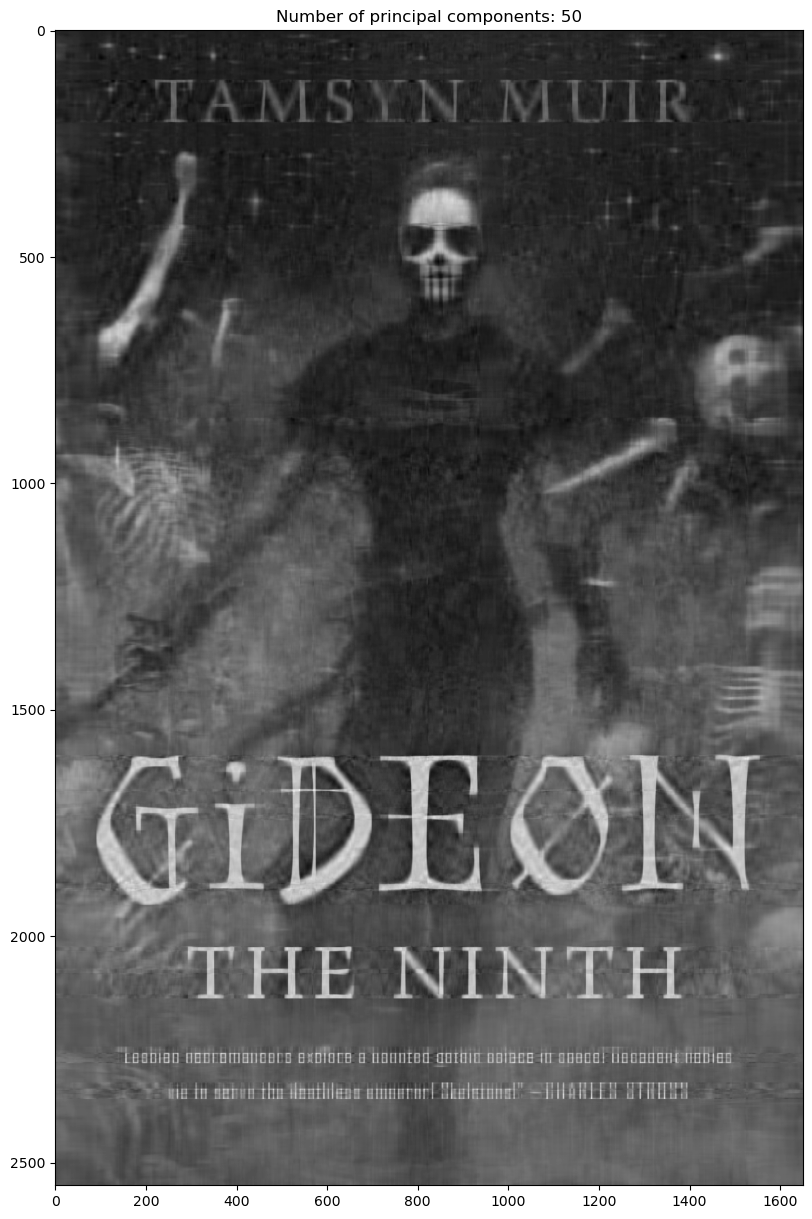

In [43]:
k = 50

array = cv2.imread('Gideon.jpg')
array = cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)


X = array.copy()


pca = PCA(n_components=k)  
X_pca = pca.fit_transform(X)          
X_reconstructed = pca.inverse_transform(X_pca)  

fig, (ax1) = plt.subplots(1, 1, figsize=(20,15))

ax1.imshow(X_reconstructed, cmap='gray')
ax1.set_title(f"Number of principal components: {k}")
print('rank(mat) = ', np.linalg.matrix_rank(X))
print('rank(mat_approx) = ', np.linalg.matrix_rank(X_pca))

plt.show()

rank(mat) =  1650
rank(mat_approx) =  25


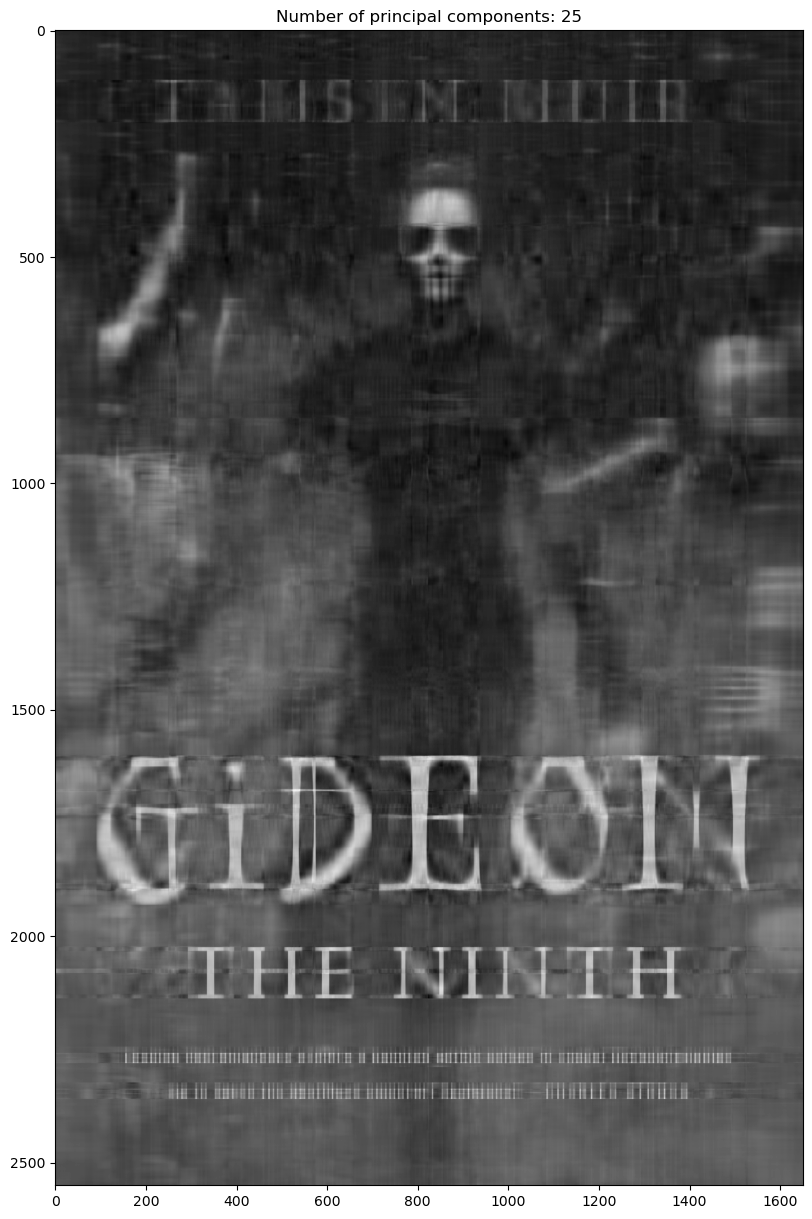

In [44]:
k = 25

array = cv2.imread('Gideon.jpg')
array = cv2.cvtColor(array,cv2.COLOR_BGR2GRAY)


X = array.copy()


pca = PCA(n_components=k)  
X_pca = pca.fit_transform(X)          
X_reconstructed = pca.inverse_transform(X_pca)  

fig, (ax1) = plt.subplots(1, 1, figsize=(20,15))

ax1.imshow(X_reconstructed, cmap='gray')
ax1.set_title(f"Number of principal components: {k}")
print('rank(mat) = ', np.linalg.matrix_rank(X))
print('rank(mat_approx) = ', np.linalg.matrix_rank(X_pca))

plt.show()